In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("creditcard.csv")

frauds = data.loc[data['Class']==1]
non_frauds = data.loc[data['Class']==0]

print(len(frauds), "frauds: ", len(non_frauds), "nonfrauds.")

492 frauds:  284315 nonfrauds.


In [5]:
print(data)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

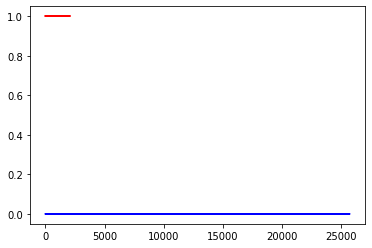

In [13]:
plt.plot(frauds['Amount'], frauds['Class'],  color='red')
plt.plot(non_frauds['Amount'], non_frauds['Class'], color='blue')
plt.show() #fraudulent cases show that smaller amounts tend to be frauds. I assume this is because higher amounts would be assessed

/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ken/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


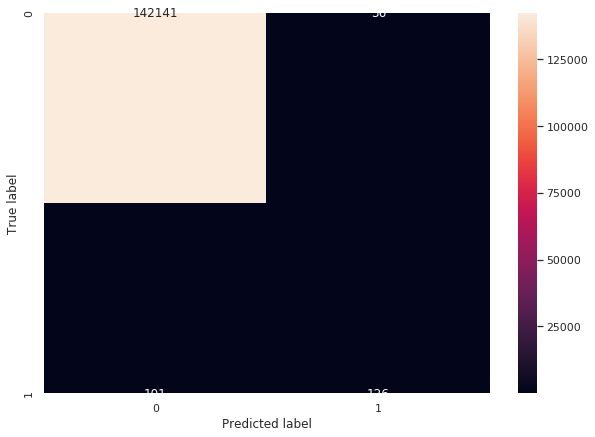

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

clf = LogisticRegression(random_state=0).fit(X, y)

y_pred = clf.predict(X_test)

draw_confusionmatrix(y_test, y_pred)

